# k-Fold Cross Validation

### Data preprocessing

In [1]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

In [2]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [3]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(1234)
split = sample.split(dataset$Purchased, SplitRatio = 0.80)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [4]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

### Fitting classifier to the Training set

In [5]:
#  install.package('e1071')
library(e1071)
classifier = svm(formula = Purchased ~ ., 
                 data = training_set, 
                 type = 'C-classification', 
                 kernel = 'radial')

### Predicting the Test set results

In [6]:
y_pred = predict(classifier, newdata = test_set[-3])

In [7]:
head(y_pred, 10)

5 15 19 29 40 42 43 54 55 76 
 0  0  1  0  0  0  1  0  0  1 
Levels: 0 1

In [8]:
head(test_set[3], 10)

,Purchased
5,0
15,0
19,1
29,0
40,0
42,0
43,0
54,0
55,0
76,1


### Applying k-Fold Cross Validation

In [9]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [10]:
folds = createFolds(training_set$Purchased, k = 10)
cv = lapply(folds, function(x){
    training_fold = training_set[-x, ]
    test_fold = training_set[x, ]
    classifier = svm(formula = Purchased ~ ., 
                 data = training_fold, 
                 type = 'C-classification', 
                 kernel = 'radial')
    y_fold_pred = predict(classifier, newdata = test_fold[-3])
    cm = table(test_fold[, 3], y_fold_pred)
    accuracy = (cm[1, 1] + cm[2, 2])/(sum(cm))
    return(accuracy)
})

In [11]:
cv

$Fold01
[1] 0.9393939

$Fold02
[1] 0.8064516

$Fold03
[1] 0.96875

$Fold04
[1] 0.8484848

$Fold05
[1] 0.9354839

$Fold06
[1] 0.84375

$Fold07
[1] 0.90625

$Fold08
[1] 0.9375

$Fold09
[1] 0.96875

$Fold10
[1] 0.90625

In [12]:
mean(as.numeric(cv))

[1] 0.9061064

In [13]:
sd(as.numeric(cv))

[1] 0.0557223

***

This signifies that we are in Low Bias Low Variance category in **Bias-Variance TradeOff**.

***

### Making the Confusion Matrix

In [14]:
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 45  6
  1  4 25

* * *

**classifier made 45 + 25 = 75 correct prediction and 6 + 4 = 10 incorect predictions.**

* * *

### Visualising the Training set results

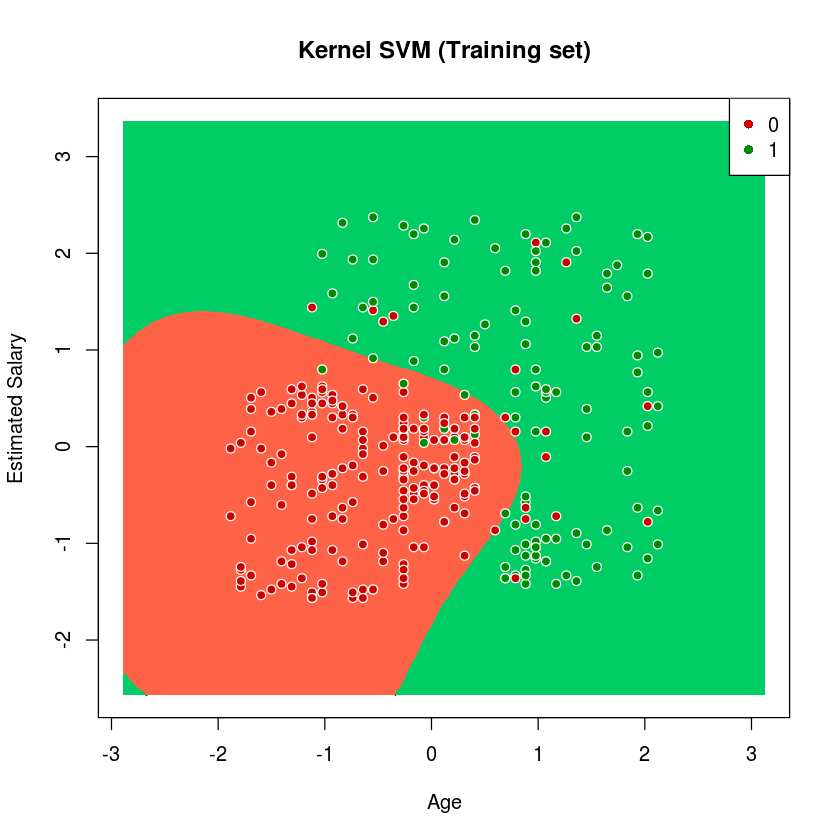

In [15]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Kernel SVM (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'), col='white')
legend("topright", legend = c("0", "1"), pch = 16, col = c('red3', 'green4'))

### Visualising the Test set results

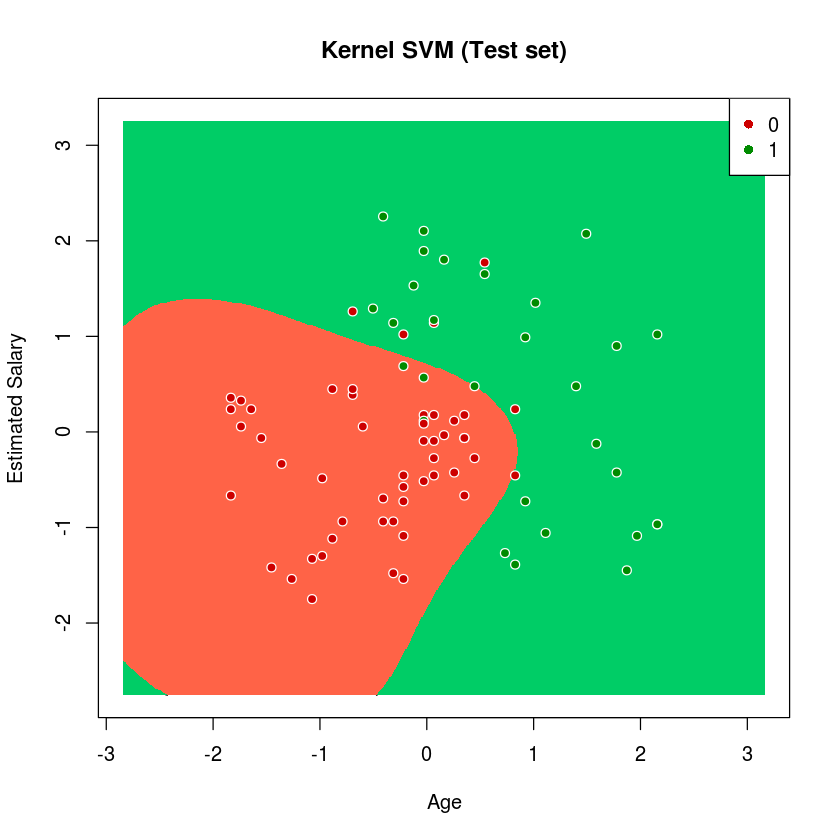

In [16]:
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'Kernel SVM (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'), col='white')
legend("topright", legend = c("0", "1"), pch = 16, col = c('red3', 'green4'))

***

**Looks like it is much better the Linear kernel.**

***